# P2 - Statistics + Visualization


This project is intended to give you experience with statistics and working with a large data set.


## Project Setup

You should use the following modules in this assignment and not need any additional modules. 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime
import os 

# Flight Delays

Suppose the Houghton County Airport (CMX) is ready to renew its passenger airplance contract.  Airport officials and interested passengers would like to select an airline and connecting city that has reliable service.  *Currently, CMX is being served by United Airlines through Chicago-O'hare (ORD); it has been served by Delta in the past with connections to Minneapolis-St. Paul (MSP).* 

In order to make an informed decision, you have been tasked to look at flight delay statistics for three potential connector airports: 

* Chicago - O'hare (ORD) 
* Detroit (DTW) 
* Minneapolis - St. Paul (MSP) 

The data you are provided comes from the US Department of Transportation's [Bureau of Transportation Statistics (BTS)](https://www.bts.gov).  In particular, it comes from the Reporting Carrier On-Time Performance data tables:  
https://www.transtats.bts.gov/TableInfo.asp?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr&V0s1_b0yB=D

Information on the variables can be found in the Field Information:  
https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ


The data is structure with the following elements: 

* "YEAR"
* "MONTH"
* "DAY_OF_MONTH"
* "OP_UNIQUE_CARRIER" - Unique Carrier Code
* "TAIL_NUM" - Tail number 
* "OP_CARRIER_FL_NUM" - Flight number 
* "ORIGIN" - Origin Airport code 
* "DEST" - Destination Airport code 
* "CRS_DEP_TIME" - Computer Reservation System Departure Time (local time: hhmm)
* "DEP_TIME" - Actual Departure Time (local time: hhmm)
* "DEP_NEXT_DAY" - the flight departed on the: (scheduled day = 0), (next day = 1), (following day = 2), or (day before  = -1)
* "CRS_ARR_TIME" - Computer Reservation System Arrival Time (local time: hhmm)
* "ARR_TIME" - Actual Arrival Time 
* "ARR_NEXT_DAY" - the flight arrived on the: (scheduled day = 0), (next day = 1), (following day = 2), or (day before  = -1)
* "CANCELLED" - Cancelled Flight Indicator (1 = Yes)
* "DIVERTED" - Diverted Flight Indicator (1 = Yes)

You have access to 5 years of data Jan 2017 - Dec 2021. 

## Q1 (5 pts) - Load Data 

Read in the data.    

Set the column names to be: `year`, `month`, `day`, `carrier`, `tailNum`, `flNum`, `origin`, `dest`, `crsDepTime`, `actDepTime`, `depNextDay`, `crsArrTime`, `actArrTime`, `arrNextDay`, `cancelled`, `diverted

In [45]:
# Read in data, set DataFrame columns to names above 
col = ['year','month','day','carrier','tailNum','flNum','origin','dest','crsDepTime','actDepTime','depNextDay','crsArrTime','actArrTime','arrNextDay','cancelled','diverted']
# Setting the names of the column and placing the row in which was previously in the place of header, into the dataset with index 0
flights = pd.read_csv('flight-data.csv',names = col)
#Getting the first 5 entries
flights.head()

,year,month,day,carrier,tailNum,flNum,origin,dest,crsDepTime,actDepTime,depNextDay,crsArrTime,actArrTime,arrNextDay,cancelled,diverted
0,2021,4,11,AS,N309AS,792,SEA,DTW,1010,1013.0,0,1730,1736.0,0,0.0,0.0
1,2021,4,11,AS,N408AS,1011,ORD,SEA,700,703.0,0,940,916.0,0,0.0,0.0
2,2021,4,11,AS,N520AS,1012,SEA,MSP,1830,1825.0,0,2345,2337.0,0,0.0,0.0
3,2021,4,11,AS,N472AS,1013,ORD,SEA,1405,1404.0,0,1645,1627.0,0,0.0,0.0
4,2021,4,11,AS,N237AK,1014,SEA,ORD,1045,1054.0,0,1650,1652.0,0,0.0,0.0


## Q2 (3 pts) - Explore Data

Let's start to explore the data.  

In [49]:
print("Flight data: %8d rows,  %d columns" % (flights.shape[0], flights.shape[1]))

Flight data:  5068847 rows,  16 columns


Report the number of flights departing and arriving from each of the three airports under study: `DTW`, `MSP`, and `ORD`

In [50]:
numArrDTW = flights[flights['dest']=='DTW'].shape[0]
numDepDTW = flights[flights['origin'] =='DTW'].shape[0]
print("DTW flights:   %7d arrivals,  %7d departures" % (numArrDTW, numDepDTW))

DTW flights:    648915 arrivals,   648900 departures


In [51]:
numArrMSP = flights[flights['dest']=='MSP'].shape[0]
numDepMSP = flights[flights['origin']=='MSP'].shape[0]
print("MSP flights:   %7d arrivals,  %7d departures" % (numArrMSP, numDepMSP))

MSP flights:    644458 arrivals,   644514 departures


In [52]:
numArrORD = flights[flights['dest']=='ORD'].shape[0]
numDepORD = flights[flights['origin']=='ORD'].shape[0]
print("ORD flights:   %7d arrivals,  %7d departures" % (numArrORD, numDepORD))

ORD flights:   1311813 arrivals,  1312017 departures


*Note*: The number of flights arriving and departing from the three airports exceeds the total number of flights, because flights between the 3 airports are counted twice. 

## Q3 (3 pts) - Cancelled and Diverted Flights

We are going to focus on flights that took off and landed, that is, flights that were not cancelled or diverted.  

Before, getting rid of those entries, let's look at how many flights for each airport were cancelled and diverted. 

In [53]:
# For DTW 
numCanArrDTW = flights[(flights['dest'] == 'DTW') & (flights['cancelled'] == 1)].shape[0]
numCanDepDTW = flights[(flights['origin'] == 'DTW') & (flights['cancelled'] == 1)].shape[0]
numDivArrDTW = flights[(flights['dest'] == 'DTW') & (flights['diverted'] == 1)].shape[0]
numDivDepDTW = flights[(flights['origin'] == 'DTW') & (flights['diverted'] == 1)].shape[0]
print("DTW cancelled flights: %7d arrs, %7d deps\n\tDiverted flights: %7d arrs, %7d deps" 
      % (numCanArrDTW, numCanDepDTW, numDivArrDTW, numDivDepDTW))

DTW cancelled flights:    9325 arrs,    9264 deps
	Diverted flights:     739 arrs,    1459 deps


In [54]:
# For MSP 
numCanArrMSP = flights[(flights['dest'] == 'MSP') & (flights['cancelled'] == 1)].shape[0]
numCanDepMSP = flights[(flights['origin'] == 'MSP') & (flights['cancelled'] == 1)].shape[0]
numDivArrMSP = flights[(flights['dest'] == 'MSP') & (flights['diverted'] == 1)].shape[0]
numDivDepMSP = flights[(flights['origin'] == 'MSP') & (flights['diverted'] == 1)].shape[0]
print("MSP cancelled flights: %7d arrs, %7d deps\n\tdiverted flights: %7d arrs, %7d deps" 
      % (numCanArrMSP, numCanDepMSP, numDivArrMSP, numDivDepMSP))

MSP cancelled flights:    9337 arrs,    9298 deps
	diverted flights:    1019 arrs,    1555 deps


In [55]:
# For ORD 
numCanArrORD = flights[(flights['dest'] == 'ORD') & (flights['cancelled'] == 1)].shape[0]
numCanDepORD = flights[(flights['origin'] == 'ORD') & (flights['cancelled'] == 1)].shape[0]
numDivArrORD = flights[(flights['dest'] == 'ORD') & (flights['diverted'] == 1)].shape[0]
numDivDepORD = flights[(flights['origin'] == 'ORD') & (flights['diverted'] == 1)].shape[0]
print("ORD cancelled flights: %7d arrs, %7d deps\n\tdiverted flights: %7d arrs, %7d deps" 
      % (numCanArrORD, numCanDepORD, numDivArrORD, numDivDepORD))

ORD cancelled flights:   36875 arrs,   35638 deps
	diverted flights:    3258 arrs,    3307 deps


The absolute number of cancelled and diverted flights can be somewhat misleading because O'hare has many more flights in total.  

So, let's look at these values normalized, that is, the percentage of total arriving or departing flights that are cancelled or diverted.

In [56]:
d = np.array([[numCanArrDTW / numArrDTW *100, numCanDepDTW / numDepDTW *100, 
               numDivArrDTW / numArrDTW *100, numDivDepDTW / numDepDTW *100], 
              [numCanArrMSP / numArrMSP *100, numCanDepMSP / numDepMSP *100, 
               numDivArrMSP / numArrMSP *100, numDivDepMSP / numDepMSP *100],
              [numCanArrORD / numArrORD *100, numCanDepORD / numDepORD *100, 
               numDivArrORD / numArrORD *100, numDivDepORD / numDepORD *100]])
canDivFls = pd.DataFrame(data=d, 
                        columns = ['PercArrCan', 'PercDepCan', 'PercArrDir', 
                                   'PercDepDir'], 
                        index = ['DTW', 'MSP', 'ORD'])
canDivFls

,PercArrCan,PercDepCan,PercArrDir,PercDepDir
DTW,1.437014,1.427647,0.113882,0.224842
MSP,1.448814,1.442637,0.158117,0.241267
ORD,2.810995,2.716276,0.248359,0.252055


## Q4 (4 pts) - Clean Data 

Now, let's remove the cancelled and diverted flights from further analysis.  

After removing both reset the index on the remaining flights in the DataFrame.

In [57]:
# Remove the cancelled and diverted flights.  
# Then, reset the index of the flights DataFrame
flights = flights.drop(flights[flights['cancelled']==1].index)
flights = flights.drop(flights[flights['diverted']==1].index)
#Resetting the index
flights.reset_index(drop=True)
print("Flight data:   %8d rows" % flights.shape[0])

Flight data:    4950620 rows


## Q5 (5 pts) - Extract Time Information

Both the departure and arrival times were read in as integers or floating-point numbers in local time format: `hhmm`. Write two functions, `extract_hour` and `extract_mins` that converts the local time to hours and minutes, respectively. Hint: You may want to use modular arithmetic and integer division.

Notes: 

* The function should work on a single value passed or a Series passed in as an argument. 
* The function should not have a `for` loop, if it does you will lose points! 

In [59]:
def extract_hour(time):
    hours = time//100
    """
    Extract hour information from the time given in hhmm format.

    Input:
        time (float64 or int64): Series of time given in hhmm format.  
          Takes on values in 0.0-2400.0 in float64 representation or 
          values in 0-2400 in int64 representation
 
    Returns:
        array (float64 or int64): Series of same dimension as input of hours  
          values should be 0-24
    
    Example: 1303 should return 13
    >>> extract_hour(1303.0)
    13
    """
    return hours

In [16]:
#Testing
extract_hour(flights['actDepTime'][100:200])

100    10.0
101     7.0
102    18.0
103    13.0
104    10.0
       ... 
195    18.0
196    10.0
197     7.0
198    18.0
199    14.0
Name: actDepTime, Length: 100, dtype: float64

In [60]:
def extract_min(time):
    """
    Extract minute information from the time given in hhmm time.

    Input:
        time (float64 or int64): Series of time given in hhmm format.  
          Takes on values in 0.0-2400.0 in float64 representation or 
          values in 0-2400 in int64 representation
    
    Returns:
        array (float64 or int64): Series of same dimension as input of minutes.  
          values should be 0-59
    
    Example: 1303 should return 3
    >>> extract_mins(1303.0)
    3
    """
    mins = time % 100
    return mins

Here are some examples of usage: 

```
>>> extract_hour(1450)
>>> extract_hour(flights['actDepTime'][100:200])
>>> extract_hour(flights['crsDepTime'])
>>> extract_mins(1450)
>>> extract_mins(flights['actDepTime'][100:200])
>>> extract_mins(flights['crsDepTime'])
```

## Q6 (2 pts) - Calculate Time in Minutes

You will use the two functions created above to calculate a time formatted `hhmm` into the number of minutes in the day.  These calculation will be done in the `convert_to_minofday` function, you will fill in.   

For example, `1005` is 605 minutes and `837` is 517 minutes and `1524` is 924 minutes. 

Comment: 

* The function should work on a single value passed or a Series passed in as an argument. 
* The function should not have a `for` loop, if it does you will lose points! 

In [61]:
def convert_to_minofday(time):
    """
    Converts time in hhmm format to minute of day.
    
    Input:
       time (float64 or int64): Series of time given in hhmm format.  
          Takes on values in 0.0-2400.0 in float64 representation or 
          values in 0-2400 in int64 representation
    
    Returns:
        array (float64 or int64): Series of same dimension as input with 
           total mins
    
     
    Example: 1303 is converted to 783
    >>> convert_to_minofday(1303.0)
    783.0
    """
    # make use of the functions you wrote above: extract_hour, extract_min
    minOfDay = extract_hour(time)*60+extract_min(time)
    return minOfDay 

## Q7 (6 pts) - Calculate Delayed Flights

You will add two new columns to the `flights` DataFrame that will contain the departure delay `depDelay` and arrival delay `arrDelay`.

To help answer this question, implement the helper functions, `calc_time_diff`.  Make use of the functions above, e.g., `convert_to_minofday`.


*Be careful for handling flights that that did not leave on their scheduled day indicated in the `depNextDay` and `arrNextDay` columns.*  
These two variables are encoded as: 
* 0, left/arrived on scheduled day 
* -1, left/arrived on the day before scheduled day
* 1, left/arrived 1 day after scheduled day 
* 2, left/arrived 2 days after scheduled day


Note, you can have *negative* flight delays for flights that leave / arrive early. 

Notes: 

* The function should work on Series passed in as an argument. 
* The function should not have a `for` loop, if it does you will lose points! 

In [62]:
def calc_time_diff(x, y, nextDay):
    """ 
    Calculate the time difference, y - x, accounting for nextDay changes.

    Input:
        x,y (float64 or int64): Series of scheduled time given in hhmm format.  
          Takes on values in 0.0-2400.0 due to float64 representation or 
          values in 0-2400 in int64 representation
        nextDay (int): Series of next day indicator, takes on values: -1, 0, 1, 2
        
    Returns:
        array (float64): array of input dimension with delay time
        
        
    Example: 1303 is converted to 783
             1305 is converted to 785
    >>> calc_time_diff(pd.Series([1303]), pd.Series([1305]), pd.Series([0]))
    2

    Example: 2320.0 is converted to 1400.0
               37.0 is converted to    37.0 
    >>> calc_time_diff(pd.Series([2320.0]), pd.Series([37.0]), pd.Series([1]))
    77.0
    """
    # make use of the convert_to_minofday function 
    diff = convert_to_minofday(y) - convert_to_minofday(x)
    diff += 1440 * (nextDay == -1)  
    diff += 1440 * (nextDay == 1) 
    diff += 2880 * (nextDay == 2)
    return diff

In [63]:
flights['depDelay'] = calc_time_diff(flights['crsDepTime'], flights['actDepTime'],flights['depNextDay'])
flights['arrDelay'] = calc_time_diff(flights['crsArrTime'], flights['actArrTime'],flights['arrNextDay'])                                                               

In [64]:
flights.head()

,year,month,day,carrier,tailNum,flNum,origin,dest,crsDepTime,actDepTime,depNextDay,crsArrTime,actArrTime,arrNextDay,cancelled,diverted,depDelay,arrDelay
0,2021,4,11,AS,N309AS,792,SEA,DTW,1010,1013.0,0,1730,1736.0,0,0.0,0.0,3.0,6.0
1,2021,4,11,AS,N408AS,1011,ORD,SEA,700,703.0,0,940,916.0,0,0.0,0.0,3.0,-24.0
2,2021,4,11,AS,N520AS,1012,SEA,MSP,1830,1825.0,0,2345,2337.0,0,0.0,0.0,-5.0,-8.0
3,2021,4,11,AS,N472AS,1013,ORD,SEA,1405,1404.0,0,1645,1627.0,0,0.0,0.0,-1.0,-18.0
4,2021,4,11,AS,N237AK,1014,SEA,ORD,1045,1054.0,0,1650,1652.0,0,0.0,0.0,9.0,2.0


## Q8 (3 pts) - Filter Delayed Flights 

Filter the `flights` data for flights that departed 75 or more minutes later than scheduled.  Report the number and a percentage of all departing flights for each airport.

In [66]:

# Using your the new column flights['depDelay'] to filter the number of flights
#  flights delayed over 75 minutes for each airport.
# numDepDTW = flights[flights['origin']=='DTW'].shape[0]
# numDepMSP = flights[flights['origin']=='MSP'].shape[0]
# numDepORD = flights[flights['origin']=='ORD'].shape[0]

delayedDTW = flights[(flights['depDelay']>=75) & (flights['origin']=='DTW')].shape[0]
delayedMSP = flights[(flights['depDelay']>=75) & (flights['origin']=='MSP')].shape[0]
delayedORD = flights[(flights['depDelay']>=75) & (flights['origin']=='ORD')].shape[0]

# Report the number and the percentage for each airport. 
print("DTW delayed flights:  %7d, %3.3f%%" % (delayedDTW, delayedDTW/numDepDTW*100))
print("MSP delayed flights:  %7d, %3.3f%%" % (delayedMSP, delayedMSP/numDepMSP*100))
print("ORD delayed flights:  %7d, %3.3f%%" % (delayedORD, delayedORD/numDepORD*100))

DTW delayed flights:    25792, 4.042%
MSP delayed flights:    21323, 3.365%
ORD delayed flights:    69335, 5.446%


<!-- BEGIN QUESTION -->

## Q9 (15 pts) - Distribution and Statistics on Flight Delays

Plot the distribution of delays for both arriving and departing flights for each airport.  

The histograms should be placed side-by-side *hint: consider the `subplot` function*. 

The departing delays should be in the left plot and the arriving delays should be in the right plot. 

Use a log-scale y-axis.   
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html?highlight=yscale#matplotlib.pyplot.yscale


Make sure to label and make the plots look nice. 

Text(0.5, 1.0, 'Delays Distribution for DTW Airport')

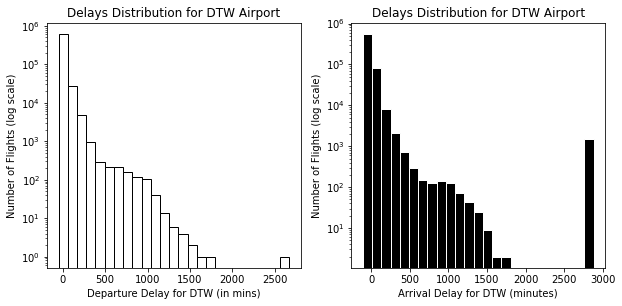

In [38]:
# Histograms for DTW 
# Using subplots
plt.figure(figsize=(10,4.5))
plt.subplot(1,2,1)
#Plotting the histogram
plt.hist(flights [flights['origin'] == 'DTW'] ['depDelay'], bins=25, color='white',edgecolor ='black')
#Using the logrithamic scale
plt.yscale('log')
plt.xlabel('Departure Delay for DTW (in mins)')
plt.ylabel('Number of Flights (log scale)')
plt.title('Delays Distribution for DTW Airport')
#Plotting the arrival delays for DTW
plt.subplot(1,2,2)
plt.hist(flights[flights['dest'] == 'DTW'] ['arrDelay'], bins=25, color='black',edgecolor ='white')
plt.yscale('log')
#Formatting
plt.xlabel('Arrival Delay for DTW (minutes)')
plt.ylabel('Number of Flights (log scale)')
plt.title('Delays Distribution for DTW Airport')


Text(0.5, 1.0, 'Delays Distribution for MSP Airport')

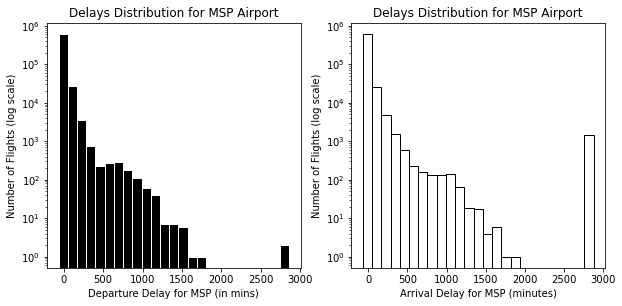

In [79]:
# Histograms for MSP 
# Using subplots
plt.figure(figsize=(10,4.5))
plt.subplot(1,2,1)
#Plotting the histogram
plt.hist(flights [flights['origin'] == 'MSP'] ['depDelay'], bins=25, color='black',edgecolor ='white')
#Using the logrithamic scale
plt.yscale('log')
plt.xlabel('Departure Delay for MSP (in mins)')
plt.ylabel('Number of Flights (log scale)')
plt.title('Delays Distribution for MSP Airport')
#Plotting the arrival delays for MSP
plt.subplot(1,2,2)
plt.hist(flights[flights['dest'] == 'MSP'] ['arrDelay'], bins=25, color='white',edgecolor ='black')
plt.yscale('log')
#Formatting
plt.xlabel('Arrival Delay for MSP (minutes)')
plt.ylabel('Number of Flights (log scale)')
plt.title('Delays Distribution for MSP Airport')


Text(0.5, 1.0, 'Delays Distribution for ORD Airport')

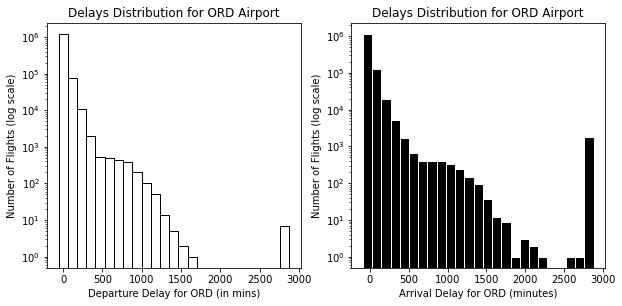

In [80]:
# Histograms for ORD 
# Create a figure and subplots
plt.figure(figsize=(10,4.5))
plt.subplot(1,2,1)
#Plotting the histogram
plt.hist(flights [flights['origin'] == 'ORD'] ['depDelay'], bins=25, color='white',edgecolor ='black')
#Using the logrithamic scale
plt.yscale('log')
plt.xlabel('Departure Delay for ORD (in mins)')
plt.ylabel('Number of Flights (log scale)')
plt.title('Delays Distribution for ORD Airport')
#Plotting the arrival delays for ORD
plt.subplot(1,2,2)
plt.hist(flights[flights['dest'] == 'ORD'] ['arrDelay'], bins=25, color='black',edgecolor ='white')
plt.yscale('log')
#Formatting
plt.xlabel('Arrival Delay for ORD (minutes)')
plt.ylabel('Number of Flights (log scale)')
plt.title('Delays Distribution for ORD Airport')

<!-- END QUESTION -->

## Q10 (3 pts) - Delay Statistics

Present the mean and standard deviation for departure and arrival delays for each airport.


In [81]:
# Calculate the mean and std. Dev. Depature Delay for flights leaving DTW/MSP/ORD
# Calculate the mean and std. Dev. Arrival Delay for flights arriving at DTW/MSP/ORD

meanArrDTW = flights[flights['dest']=='DTW']['arrDelay'].mean()
stdArrDTW = flights[flights['dest']=='DTW']['arrDelay'].std()

meanArrMSP =flights[flights['dest']=='MSP']['arrDelay'].mean()
stdArrMSP = flights[flights['dest']=='MSP']['arrDelay'].std()

meanArrORD = flights[flights['dest']=='ORD']['arrDelay'].mean()
stdArrORD = flights[flights['dest']=='ORD']['arrDelay'].std()

meanDepDTW = flights[flights['origin']=='DTW']['depDelay'].mean()
stdDepDTW = flights[flights['origin']=='DTW']['depDelay'].std()

meanDepMSP = flights[flights['origin']=='MSP']['depDelay'].mean()
stdDepMSP = flights[flights['origin']=='MSP']['depDelay'].std()

meanDepORD = flights[flights['origin']=='ORD']['depDelay'].mean()
stdDepORD = flights[flights['origin']=='ORD']['depDelay'].std()



print("Depature Delay for flights leaving DTW")
print(" Mean:    ", meanDepDTW)
print(" Std Dev: ", stdDepDTW)

print("Arrival Delay for flights arriving in DTW")
print(" Mean:    ", meanArrDTW)
print(" Std Dev: ", stdArrDTW)

print("\nDepature Delay for flights leaving MSP")
print(" Mean:    ", meanDepMSP)
print(" Std Dev: ", stdDepMSP)

print("Arrival Delay for flights arriving in MSP")
print(" Mean:    ", meanArrMSP)
print(" Std Dev: ", stdArrMSP)

print("\nDepature Delay for flights leaving ORD")
print(" Mean:    ", meanDepORD)
print(" Std Dev: ", stdDepORD)

print("Arrival Delay for flights arriving in ORD")
print(" Mean:    ", meanArrORD)
print(" Std Dev: ", stdArrORD)

Depature Delay for flights leaving DTW
 Mean:     7.5927405833482196
 Std Dev:  43.61499268202019
Arrival Delay for flights arriving in DTW
 Mean:     7.45310878436443
 Std Dev:  146.47135753115043

Depature Delay for flights leaving MSP
 Mean:     6.539962945545101
 Std Dev:  43.042282964236065
Arrival Delay for flights arriving in MSP
 Mean:     5.970643524227963
 Std Dev:  146.96470883333268

Depature Delay for flights leaving ORD
 Mean:     10.85803788002564
 Std Dev:  47.322382577210384
Arrival Delay for flights arriving in ORD
 Mean:     8.950908247357827
 Std Dev:  122.47955196586678


## Patterns of Delays 

Next, you will examine if there are any patterns in the delays.  

For this analysis focus on just the data from ORD, in particular the departure delays. 

<!-- BEGIN QUESTION -->

## Q11 (5 pts) - Departure Delays by Day of Week

Let's examine if the departure delays differ by which day a flight is scheduled to leave.

Create a bar chart showing the mean departure delay for each day of the week.

In order to get the day of the week, I suggest create a new column `dateVal` that is a datetime object.  Then, you can make use of functions to convert datetime to day of the week, day of the year, etc. 

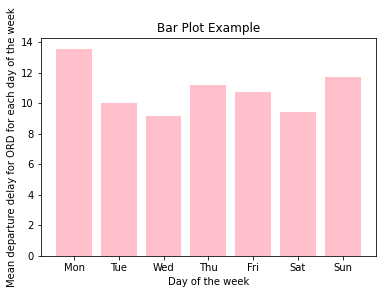

In [34]:
# Create a new column "dateVal" with a datetime object that may be useful
#  for this and the following questions. 
flights['dateVal'] = pd.to_datetime(flights[['year', 'month', 'day']])
flights['day_week_val'] = flights['dateVal'].dt.dayofweek
# Look at departure delays for ORD 
bar_values = flights[flights['origin']=='ORD'].groupby('day_week_val')['depDelay'].mean()
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# Create a bar chart of the mean `depDelay` by day of the week: Mon., Tues., ...
plt.bar(days_of_week, bar_values,color ='pink')
plt.xlabel('Day of the week')
plt.ylabel('Mean departure delay for ORD for each day of the week')
plt.title('Bar Plot Example')
# Showing the plot
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q12 (5 pts) - Dept. Delays by Month

Next, let's examine if the depature delays differ by month of the year. 

Create a bar chart showing the mean departure delay for each month of the year.

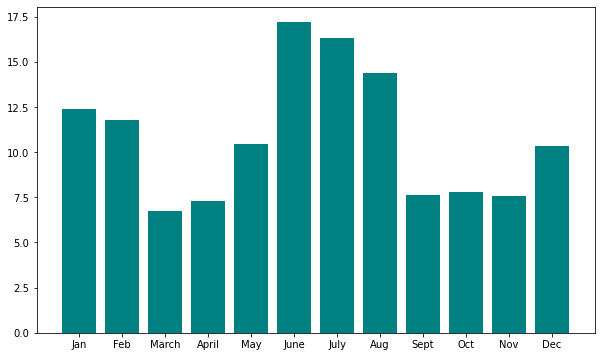

In [39]:
# Create a bar plot with the mean dep. delay for each month. 
flights['day_of_month_val'] = flights['dateVal'].dt.month
plt.figure(figsize=(10,6))
bar_values_month = flights[flights['origin']=='ORD'].groupby('day_of_month_val')['depDelay'].mean()
days_of_month = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.bar(days_of_month,bar_values_month, color='teal')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q13 (6 pts) - Change in Dept. Delays over Time 

Finally, let's examine how the depature delays have changed over time, e.g., has covid impacted depature delays? 

Create a line graph plotting the mean depature delay for data's timespan. 

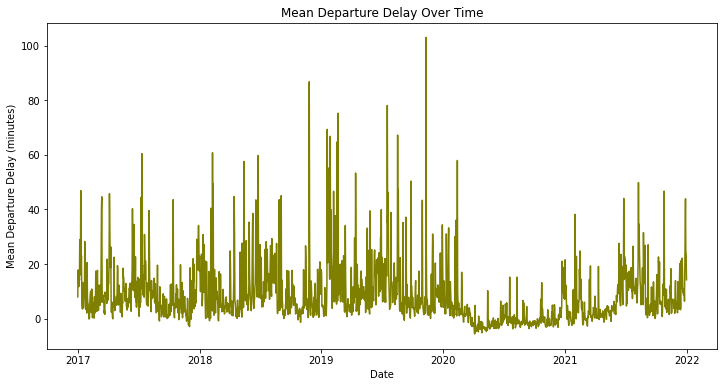

In [73]:

flights['dateVal_a'] = pd.to_datetime(flights[['year', 'month', 'day']])
# Grouping the flights
mean_dep_delay_over_time = flights.groupby('dateVal_a')['depDelay'].mean()
# Creating the chart
plt.figure(figsize=(12, 6))
plt.plot(mean_dep_delay_over_time, color='olive')
plt.xlabel('Date')
plt.ylabel('Mean Departure Delay (minutes)')
plt.title('Mean Departure Delay Over Time')
plt.show()

#Covid impacted delays?
# During the COVID-19 pandemic, flight delays exhibited a notable peak, with delays extending up to 
# approximately 180 minutes beyond scheduled departure times.  
# However, following this , there was a gradual decline in delay occurrences.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Bonus (2 pts) - Top Ten Planes 

Find the tail number of the top ten planes, with the worst departure delays (average delays).  You may find `drop_duplicates`, `agg`, and `sort_values` helpful. 
Report out the tail number `tailNum`, number of flights `num`, and the mean delay `mnDelay`. 

In [78]:
# Find the tail numbers of the planes with the worst mean dep. delays. 
# Store the tail number "tailNum", number of flights "num", and
#   mean delay "mnDelay" in a DataFrame
mean_del_t = flights.groupby('tailNum')['depDelay'].agg(['mean', 'count'])
mean_del_t.columns = ['mnDelay', 'num']
# Sorting the DataFrame by mean delay in descending order
mean_del_t = mean_del_t.sort_values(by='mnDelay', ascending=False)
# Getting the top ten planes with the worst mean departure delays
topDelayed = mean_del_t.head(10)
# Resetting index to make tailNum a regular column
topDelayed.reset_index(inplace=True)
# Display the DataFrame
print(topDelayed)

  tailNum  mnDelay  num
0  N727AN    659.0    2
1  N733AR    626.5    4
2  N785AA    538.0    1
3  N786AA    505.0    1
4  N7LRAA    411.5    2
5  N724AN    351.0    1
6  N206PS    287.0    1
7  N178UA    276.0    1
8  N7BDAA    270.0    1
9  N7LVAA    259.0    2
